![](https://user-images.githubusercontent.com/67869508/139522621-629bafc8-58a8-43ff-9c66-8cf662a132b5.png)

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/segmentation-image/Screenshot 2026-02-06 190319.png
/kaggle/input/tumer-image/images.jpg


In [2]:
import cv2
import matplotlib.pyplot as plt

## 1. Definition and Explanation of Image Segmentation:

<font color="green">
Image segmentation is the classification of an image into different groups. 
    
Image segmentation is the task of partitioning an image into multiple segments. In semantic segmentation, all pixels that are part of the same object type get assigned to the same segment. For example, in a selfdriving car’s vision system, all pixels that are part of a pedestrian’s image might be assigned to the “pedestrian” segment (there would be one segment containing all the pedestrians).In some applications, this may be sufficient. For example, if you want to analyze satellite images to measure how much total forest area there is in a region, color segmentation may be just fine.
    
    
    
Image segmentation is the process of partitioning a digital image into multiple distinct regions containing each pixel(sets of pixels, also known as superpixels) with similar attributes.
    
    
The goal of Image segmentation is to change the representation of an image into something that is more meaningful and easier to analyze.
    
    
Image segmentation is typically used to locate objects and boundaries(lines, curves, etc.) in images. More precisely, Image Segmentation is the process of assigning a label to every pixel in an image such that pixels with the same label share certain characteristics.

## 2.Where Can We Use Image Segmentation:

<font color="purple">
1. In  Autonomous Vehicles: they need sensory input devices like cameras, radar, and lasers to allow the car to perceive the world around it, creating a digital map. Autonomous driving is not even possible without object detection which itself involves image classification/segmentation.
    
    
    
2. Healthcare Industry:if we talk about Cancer, even in today’s age of technological advancements, cancer can be fatal if we don’t identify it at an early stage. Detecting cancerous cell(s) as quickly as possible can potentially save millions of lives. The shape of the cancerous cells plays a vital role in determining the severity of cancer which can be identified using image classification algorithms.



**Image Segmentation using K-Means Clustering**

K-Means clustering is an unsupervised machine learning algorithm that groups data points into K distinct clusters based on similarity. In image segmentation, K-Means is used to partition an image into meaningful regions by clustering pixels according to their color intensities.

**Steps of K-means for Image Segmentation**
1. Load image
2. Convert pixels → feature vectors (RGB)
3. Run K-means
4. Replace each pixel by its cluster color
5. Reshape back to image


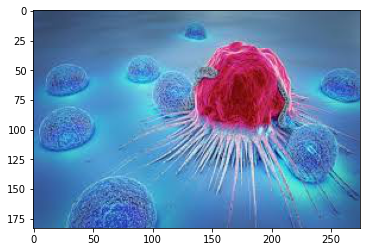

In [3]:
img = plt.imread("/kaggle/input/tumer-image/images.jpg")
plt.imshow(img)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:10: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  # Remove the CWD from sys.path while we load stuff.


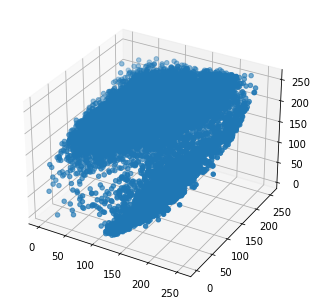

In [4]:
from mpl_toolkits.mplot3d import Axes3D
import cv2
img = plt.imread("/kaggle/input/tumer-image/images.jpg")
#img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
r, g, b = cv2.split(img)
r = r.flatten()
g = g.flatten()
b = b.flatten()#plotting 
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(r, g, b)
plt.show()
#From the plot one can easily see that the data points are forming groups — 
#some places in a graph are more dense, which we can think as different colors’ dominance on the image.

## 3. K Means Algorithm for Image Segmentation:

<font color="purple">
K Means clustering algorithm is an unsupervised algorithm and it is used to segment the interest area from the background. It clusters, or partitions the given data into K-clusters or parts based on the K-centroids.
    

The algorithm is used when you have unlabeled data(i.e. data without defined categories or groups). The goal is to find certain groups based on some kind of similarity in the data with the number of groups represented by K.

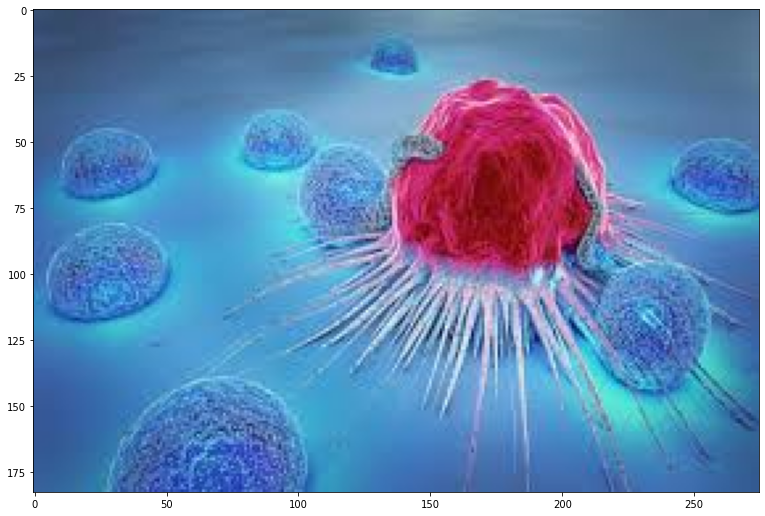

In [5]:
img = cv2.imread("/kaggle/input/tumer-image/images.jpg")
img=cv2.cvtColor(img ,cv2.COLOR_BGR2RGB)
plt.figure(figsize=(13,10))
plt.imshow(img)

In [6]:
img.shape #the first is height, the second is width and the third is the color channel of the image

(183, 275, 3)

In [7]:
#Next, converts the HxWx3 image into a Kx3 matrix where K=HxW and each row is now a vector in the 3-D space of RGB.
vectorized_img = img.reshape((-1,3))
vectorized_img.shape

(50325, 3)

In [8]:
#We convert the unit8 values to float as it is a requirement of the k-means method of OpenCV.
vectorized_img= np.float32(vectorized_img)
vectorized_img

array([[ 57.,  80., 114.],
       [ 57.,  80., 114.],
       [ 57.,  80., 114.],
       ...,
       [ 51.,  90., 145.],
       [ 51.,  90., 145.],
       [ 51.,  90., 145.]], dtype=float32)

<font color="purple">
We are going to cluster with k = 3 because if you look at the image above it has 3 colors, green-colored grass and forest, blue sea and the greenish-blue seashore.

<font color="purple">
OpenCV provides cv2.kmeans(samples, nclusters(K), criteria, attempts, flags) function for color clustering.

1. samples: It should be of np.float32 data type, and each feature should be put in a single column.

2. nclusters(K): Number of clusters required at the end

3. criteria: It is the iteration termination criteria. When this criterion is satisfied, the algorithm iteration stops. Actually, it should be a tuple of 3 parameters. They are `( type, max_iter, epsilon )`:

Type of termination criteria. It has 3 flags as below:

cv.TERM_CRITERIA_EPS — stop the algorithm iteration if specified accuracy, epsilon, is reached.
cv.TERM_CRITERIA_MAX_ITER — stop the algorithm after the specified number of iterations, max_iter.
cv.TERM_CRITERIA_EPS + cv.TERM_CRITERIA_MAX_ITER — stop the iteration when any of the above condition is met.
4. attempts: Flag to specify the number of times the algorithm is executed using different initial labelings. The algorithm returns the labels that yield the best compactness. This compactness is returned as output.

5. flags: This flag is used to specify how initial centers are taken. Normally two flags are used for this: cv.KMEANS_PP_CENTERS and cv.KMEANS_RANDOM_CENTERS.



In [9]:
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 10, 1.0)

In [10]:
K = 2
attempts=10
ret,label,center=cv2.kmeans(vectorized_img,K,None,criteria,attempts,cv2.KMEANS_PP_CENTERS)

In [11]:
center = np.uint8(center)
center

array([[ 84, 138, 186],
       [167,  37,  77]], dtype=uint8)

In [12]:
#Next, we have to access the labels to regenerate the clustered image
res = center[label.flatten()]
result_image = res.reshape((img.shape))

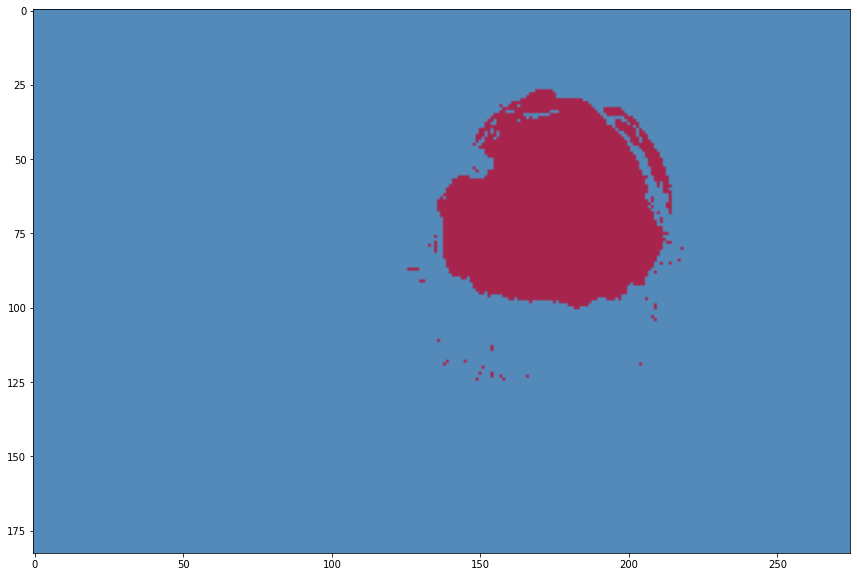

In [13]:
plt.figure(figsize=(15,10))
plt.imshow(result_image)

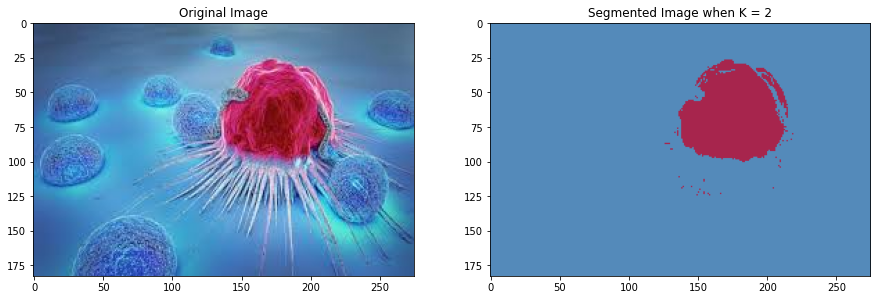

In [14]:
plt.figure(figsize=(15,12))
plt.subplot(1,2,1)
plt.imshow(img)
plt.title('Original Image')
plt.subplot(1,2,2)
plt.imshow(result_image)
plt.title('Segmented Image when K = %i' % K)
plt.show()

<font color="purple">
Let's see what happens when we change the value of K=5:

In [15]:
K = 5
attempts=10
ret,label,center=cv2.kmeans(vectorized_img,K,None,criteria,attempts,cv2.KMEANS_PP_CENTERS)

In [16]:
center = np.uint8(center)
center

array([[ 74, 127, 180],
       [167,  33,  73],
       [ 88, 165, 209],
       [167, 174, 213],
       [ 62,  98, 147]], dtype=uint8)

In [17]:
res = center[label.flatten()]
result_image = res.reshape((img.shape))

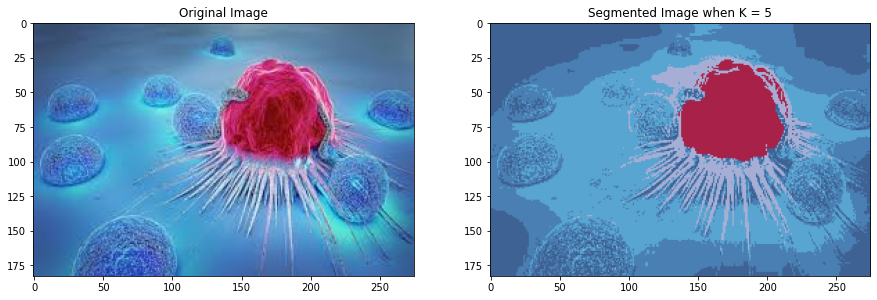

In [18]:
plt.figure(figsize=(15,12))
plt.subplot(1,2,1)
plt.imshow(img)
plt.title('Original Image')
plt.subplot(1,2,2)
plt.imshow(result_image)
plt.title('Segmented Image when K = %i' % K)
plt.show()

<font color="purple">
As you can see with an increase in the value of K, the image becomes clearer because the K-means algorithm can classify more classes/cluster of colors.

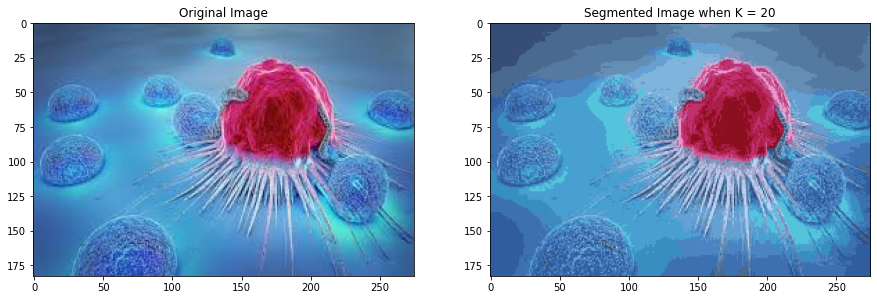

In [19]:
K = 20
attempts=10
ret,label,center=cv2.kmeans(vectorized_img,K,None,criteria,attempts,cv2.KMEANS_PP_CENTERS)
center = np.uint8(center)
res = center[label.flatten()]
result_image = res.reshape((img.shape))
plt.figure(figsize=(15,12))
plt.subplot(1,2,1)
plt.imshow(img)
plt.title('Original Image')
plt.subplot(1,2,2)
plt.imshow(result_image)
plt.title('Segmented Image when K = %i' % K)
plt.show()

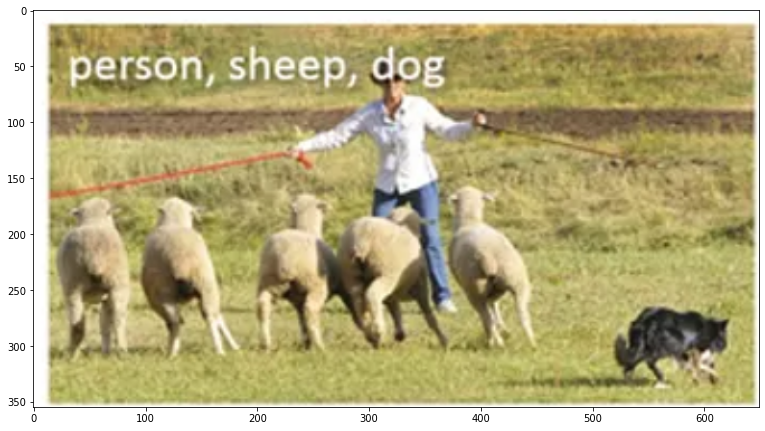

In [20]:
img2 = cv2.imread("/kaggle/input/segmentation-image/Screenshot 2026-02-06 190319.png")
img2 =cv2.cvtColor(img2 ,cv2.COLOR_BGR2RGB)
plt.figure(figsize=(13,10))
plt.imshow(img2)

In [21]:
#Next, converts the HxWx3 image into a Kx3 matrix where K=HxW and each row is now a vector in the 3-D space of RGB.
vectorized_img2 = img2.reshape((-1,3))
vectorized_img2.shape

(230395, 3)

In [22]:
#We convert the unit8 values to float as it is a requirement of the k-means method of OpenCV.
vectorized_img2= np.float32(vectorized_img2)
vectorized_img2

array([[255., 255., 255.],
       [255., 255., 255.],
       [255., 255., 255.],
       ...,
       [255., 253., 252.],
       [255., 253., 254.],
       [255., 254., 254.]], dtype=float32)

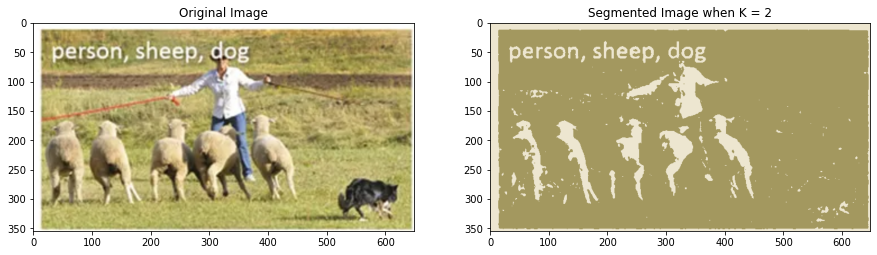

In [23]:
K = 2
attempts=10
ret,label,center=cv2.kmeans(vectorized_img2,K,None,criteria,attempts,cv2.KMEANS_PP_CENTERS)
center = np.uint8(center)
res = center[label.flatten()]
result_image = res.reshape((img2.shape))
plt.figure(figsize=(15,12))
plt.subplot(1,2,1)
plt.imshow(img2)
plt.title('Original Image')
plt.subplot(1,2,2)
plt.imshow(result_image)
plt.title('Segmented Image when K = %i' % K)
plt.show()

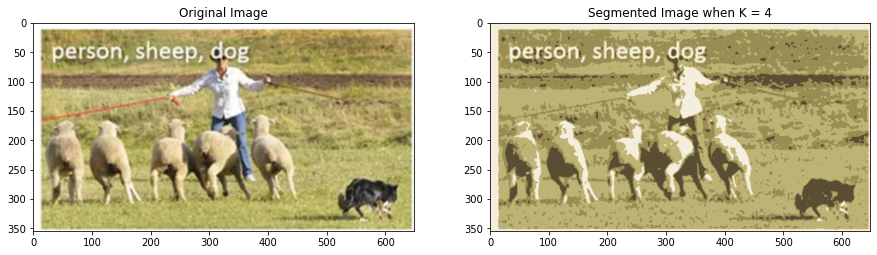

In [24]:
K = 4
attempts=10
ret,label,center=cv2.kmeans(vectorized_img2,K,None,criteria,attempts,cv2.KMEANS_PP_CENTERS)
center = np.uint8(center)
res = center[label.flatten()]
result_image = res.reshape((img2.shape))
plt.figure(figsize=(15,12))
plt.subplot(1,2,1)
plt.imshow(img2)
plt.title('Original Image')
plt.subplot(1,2,2)
plt.imshow(result_image)
plt.title('Segmented Image when K = %i' % K)
plt.show()